# Regresión lineal simple

## Introducción

La **regresión lineal** es un método estadístico que nos permite modelar la relación entre una **variable dependiente** $Y$ y una o más **variables independientes** $X_i$ (también llamadas **predictores** o ***features*** o características). El objetivo es encontrar una **función lineal** $f$ que nos permita predecir el valor de $Y$ para cualquier valor de $X_i$ en una **distribución continua**.

Para simplificar y comprender de modo sencillo los conceptos básicos, en este ejemplo crearemos un modelo que prediga el salario de un trabajador considerando solo los años de experiencia. Es decir, utilizaremos una única variable independiente, por lo que estaremos ante un caso de **regresión lineal simple**. Es evidente que sería necesario analizar más variables para tener un mejor modelo. Si quisiéramos considerar más variables independientes (p.ej. nivel de estudios, tipo de trabajo, sector, ciudad, etc.), tendríamos que utilizar un modelo de **regresión lineal múltiple**.

## Lectura y exploración de datos

Tenemos los datos de los salarios de los empleados de una empresa junto con los años de experiencia de cada uno (fichero `salaries.csv`). Utilizamos la librería `pandas` para leer los datos desde un archivo [csv](https://es.wikipedia.org/wiki/Valores_separados_por_comas).

In [9]:
import os
print(os.path.exists(r'D:\examen\Examen\regresion_lineal\csv\salaries.csv'))

True


In [4]:
import pandas as pd
df = pd.read_csv('D:/examen/Examen/regresion_lineal/csv/salaries.csv')

In [5]:
df.head() # Muestra las primeras 5 filas para una vista preeliminar de los datos

,YearsExperience,Salary
0,2.30,39892.0
1,8.29,113813.0
2,5.00,67939.0
3,5.40,83089.0
4,6.10,93941.0


In [6]:
df.info() # Muestra información sobre el dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


Si nuestro objetivo es estimar el salario que tendrá un empleado en función de los años de experiencia que tenga, consideraremos el número de años de experiencia como la **variable independiente** y el salario como la **dependiente**. Esto significa que estamos asumiendo una **relación causal entre ambas variables**: el salario depende (es función) de los años de experiencia que tenga el empleado.

## Visualización de los datos

Vamos a crear un **gráfico de dispersión (*scatter plot*)** para ver la relación entre ambas variables.

Un gráfico de dispersión muestra sobre coordenadas cartesianas para mostrar los valores de dos variables para un conjunto de datos. En este caso, visualizaremos un punto para cada empleado, donde el eje X representa los años de experiencia y el eje Y el salario que cobra.

Utilizo el método ```dataframe.plot``` de **pandas** para crear el gráfico de dispersión. Este método utiliza, a su vez, la librería **matplotlib** para crear el gráfico.

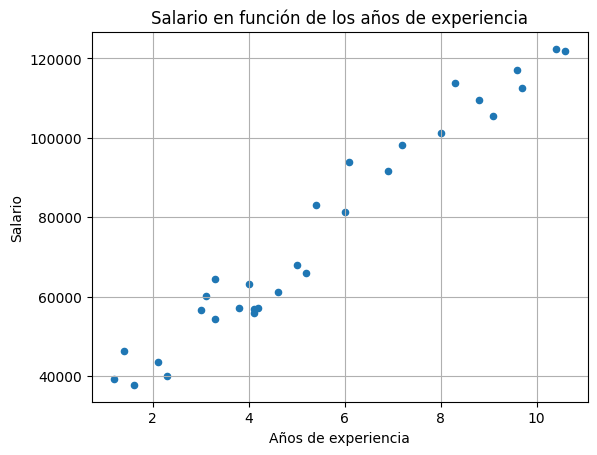

In [7]:
_ = df.plot(kind='scatter', # Crear un gráfico de dispersión
        x='YearsExperience', # Eje X (variable independiente)
        y='Salary', # Eje Y (variable dependiente)
        title='Salario en función de los años de experiencia',
        grid=True, # Mostrar cuadrícula
        xlabel='Años de experiencia', # Etiqueta del eje X
        ylabel='Salario') # Etiqueta del eje Y

Podemos observar una **correlación** clara entre ambas variables: a mayor número de años de experiencia, mayor salario. Y la relación parece bastante lineal, es decir, podemos aproximarla con una recta (para un parámetro, en regresión lineal múltiple sería un plano o un **hiperplano**).

Los datos nos dan una muestra de la realidad y buscamos encontrar un **modelo** la describa. Al aplicar después el modelo a un empleado del que solo sabemos sus años de experiencia, obtendremos una **predicción** de su salario.

## Modelo de regresión lineal


Buscamos por tanto una línea recta que sea el modelo que mejor se ajuste a los datos. Sabiendo que una recta viene definida por la fórmula
$$\mathbf{y = m*x + b}$$
(donde $m$ es la pendiente de la recta y $b$ es el punto de intersección con el eje y), tenemos que encontrar los valores de $m$ y $b$ que mejor se ajusten a los datos.

**El modelo va a estar formado por esa fórmula y los parámetros del modelo son los coeficientes $\mathbf{m}$ y $\mathbf{b}$**.


In [8]:
# Definimos x como un vector con los datos de años de experiencia e y como un vector con los datos de salario correspondientes a cada valor de x
x = df['YearsExperience'].values
y = df['Salary'].values

Importamos la clase `linear_model.LinearRegression` de la librería **scikit-learn**. Esta clase implementa el **modelo** de regresión lineal y nos permite **entrenarlo** con los datos que tenemos.

Documentación sobre modelos lineales en scikit-learn: https://scikit-learn.org/stable/modules/linear_model.html

In [9]:
from sklearn.linear_model import LinearRegression

El método ```LinerRegression.fit()``` recibe como parámetros los valores de las variables independientes y dependiente y calcula los valores de los **parámetros del modelo** que mejor se ajustan a los datos.

In [10]:
model = LinearRegression().fit(x.reshape(-1,1),y)

En este caso solo tenemos una variable independiente x (años de experiencia), pero podríamos tener más (**LinearRegresión permite también regresión linear múltiple**). Es por esto que el primer parámetro es una matriz de dos dimensiones (un array de arrays) donde cada fila es una muestra y cada columna una variable independiente. El parámetro X debe, por tanto, ser un array de dos dimensiones donde cada fila es una muestra y cada columna una variable independiente. Es por eso que hacemos un ```reshape``` para convertirlo en un array con 1 columna y tantas filas como muestras haya.

También podríamos pasarle directamente los datos desde el dataframe, esto es equivalente a lo anterior, pero incorpora al modelo los nombres de las *features*

In [11]:
modelo = LinearRegression().fit(df[['YearsExperience']], df['Salary'])

Es importante recordar que ```df[['YearsExperience']]``` devuelve un dataframe con una sola columna, mientras que ```df['Salary']``` devuelve una serie. Para la variable dependiente (y) el método acepta ambas opciones, aunque es más común pasarle una serie ya que predice una única variable dependiente. Sin embargo, para las variables independientes (x) solo acepta los datos en columnas ya que puede haber más de una variable independiente, en cuyo caso deberíamos pasarle un dataframe con tantas columnas como variables independientes haya. 
Es el mismo motivo por el que, cuando usamos NumPy, hacemos un ```reshape```.

In [12]:
pendent = model.coef_
tall = model.intercept_
funcio = pendent * x + tall

pendent = pendent[0]


En este caso utilizamos la notación ŷ para referirnos a las predicciones de la variable dependiente $y$. O sea:
- ŷ es el valor que predice el modelo para un valor de $x$
- y son los valores reales de la variable dependiente (las muestras que tenemos desde el principio)

Esta notación es más matemática/estadística que propia de Python, pero es muy utilizada en el ámbito de la ciencia de datos.

### Visualización de la línea de regresión y sus residuos

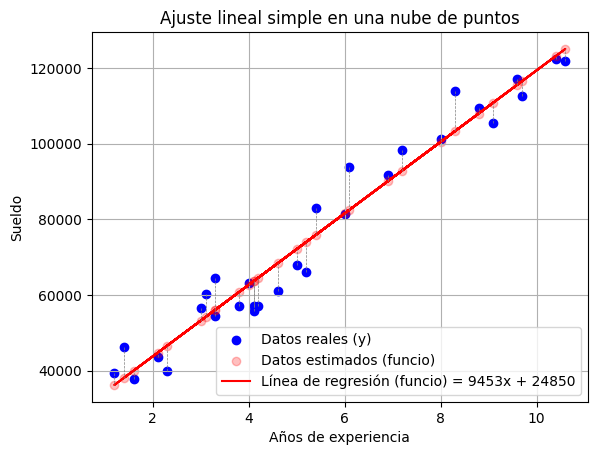

In [13]:
 # Esta gráfica es más completa que la anterior así que utilizo directamente la librería matplotlib para hacerla
from matplotlib import pyplot as plt

# Traza como nube de puntos los datos reales (y) y los datos estimados (ŷ)
plt.scatter(x, y, c='blue', label='Datos reales (y)')
plt.scatter(x, funcio, c='red', label='Datos estimados (funcio)', alpha=0.25) # alpha es la transparencia de los puntos en la función scatter
# Traza la línea de regresión
plt.plot(x, funcio,  c='red', label=f'Línea de regresión (funcio) = {round(pendent)}x + {round(tall)}')

# Dibujar las líneas de error (líneas desde los datos de entrada hasta la línea de ajuste)
for xi, yi, ŷi in zip(x, y, funcio): # zip() asocia en tuplas los elementos de las listas, desempaquetamos e iteramos sobre cada trío de elementos
    plt.plot([xi, xi], [yi, ŷi], c='gray', linestyle='--', linewidth=.5) # traza una línea desde el punto (xi, yi) hasta el punto (xi, yf)

plt.xlabel('Años de experiencia')  # Etiqueta del eje x
plt.ylabel('Sueldo')  # Etiqueta del eje y
plt.title('Ajuste lineal simple en una nube de puntos')
plt.legend() # Mostrar la leyenda
plt.grid(True) # Agregar una cuadrícula 
plt.show() # Mostrar el gráficomodel = LinearRegression().fit(df[['YearsExperince']], df['Salary'])

Podemos ver cada uno de los puntos junto con la línea de regresión que hemos calculado y el **residuo** (la desviación del modelo con respecto al valor real) que tiene cada valor de entrada con respecto a la predicción del modelo. Lo que hemos buscado es la línea que mejor minimiza eses **residuos**.

El concepto de **error** es similar al de residuo, pero se refiere a la desviación de una medida con respecto al valor real. Si partiésemos de un modelo perfecto y tomásemos medidas, la desviación encontrada sería un error, pero como estamos haciendo el proceso al revés (partimos de las medidas y buscamos un modelo que las explique), hablamos de residuos. Ahora bien, en ambos casos la desviación se mide con métricas de error. Para encontrar la línea que mejor se ajusta a los datos, hemos buscado la que minimizar alguna de esas métricas.

En este caso, hemos **minimizado el error cuadrático medio (MSE, *Mean Squared Error*)**, que es la media de los errores (en este caso de los residuos) al cuadrado.

En la explicación previa, extraemos los coeficientes del modelo y calculamos la formula de la recta con ellos para ayudar a la comprensión del concepto, pero realmente podríamos hacerlo directamente con el método ```LinearRegression.predict()```, que nos devuelve las predicciones para los valores de entrada que le pasemos:

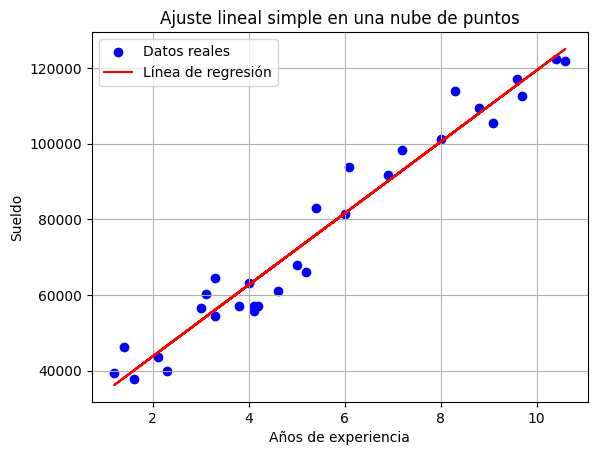

In [54]:
plt.scatter(x, y, c='blue', label='Datos reales')
plt.plot(x, model.predict(x.reshape(-1, 1)), c='red', label=f'Línea de regresión')

plt.xlabel('Años de experiencia')  # Etiqueta del eje x
plt.ylabel('Sueldo')  # Etiqueta del eje y
plt.title('Ajuste lineal simple en una nube de puntos')
plt.legend() # Mostrar la leyenda
plt.grid(True) # Agregar una cuadrícula 
plt.show() # Mostrar el gráfico

## Métricas de error / Funciones de coste

Existen diferentes métricas para medir el error de un modelo de regresión. Las más comunes son el error cuadrático medio (MSE, *Mean Squared Error*) y el error absoluto medio (MAE, *Mean Absolute Error*). 

Estas métricas se usan también como **función de coste (*cost function*)** a minimizar cuando entrenemos el modelo.

In [14]:
import numpy as np

mae = np.mean(np.abs(y-funcio))

### Error cuadrático medio (MSE)

Por los problemas del MAE, lo habitual es utilizar el **error cuadrático medio (MSE, *Mean Squared Error*)** que es la media de los errores al cuadrado.

$$ MSE(x,y)= \frac{1}{n}\sum_{i=1}^{n}{(y_i-\hat y_i)^2}$$

Al elevar al cuadrado los errores, ya estamos evitando que se cancelen entre sí. Además, al ser una función cuadrática, es diferenciable en todos los puntos, lo que facilita su uso en algoritmos de optimización.

Hay que tener en cuenta que al elevar al cuadrado, penalizamos más los **valores atípicos o *outliers*** (aquellos que están muy alejados de la predicción) que con el MAE. Esto puede ser deseable o no, dependiendo del problema. Este tipo de cuestiones abren la puerta a debatir sobre cual de las muchas métricas es la más adecuada para cada problema.

Como el MSE es la media de los errores al cuadrado, se suele utilizar como métrica de error el **RMSE** (raíz cuadrada del error cuadrático medio) para que tenga la misma unidad que la variable dependiente, lo que facilita su interpretación.

$$ RMSE(x,y)= \sqrt{\frac{1}{n}\sum_{i=1}^{n}{(y_i-\hat y_i)^2}}$$

In [19]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error

print("MSE calculado por su fórmula: ", np.mean((y-funcio)**2))
print("MSE calculado con scikit-learn: ", mean_squared_error(y, funcio))

print("RMSE calculado por su fórmula: ", np.sqrt(np.mean((y-funcio)**2)))
print("RMSE calculado con scikit-learn: ", root_mean_squared_error(y, funcio))

MSE calculado por su fórmula:  31284275.3151971
MSE calculado con scikit-learn:  31284275.3151971
RMSE calculado por su fórmula:  5593.234780982924
RMSE calculado con scikit-learn:  5593.234780982924


### Ejemplo de errores en líneas no ajustadas

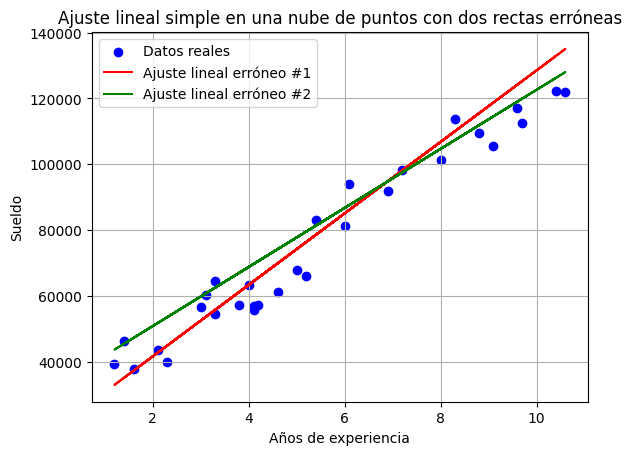

In [20]:
# Generamos dos líneas de ajuste erróneas para comparar con la línea de ajuste correcta
ŷ_err_1 = pendent*(1.15) * x + tall - 5000 
ŷ_err_2 = pendent*(0.95) * x + tall + 8000

plt.scatter(x, y, c='blue', label='Datos reales')
plt.plot(x, ŷ_err_1, c='red', label='Ajuste lineal erróneo #1')
plt.plot(x, ŷ_err_2, c='green', label='Ajuste lineal erróneo #2')
plt.xlabel('Años de experiencia')  # Etiqueta del eje x
plt.ylabel('Sueldo')  # Etiqueta del eje y
plt.title('Ajuste lineal simple en una nube de puntos con dos rectas erróneas')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# Calcular RMSE
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

print(f"El MAE en la predicción #1 (mal) es {round(mean_absolute_error(y,ŷ_err_1))} €")
print(f"El MAE en la predicción #2 (mal) es {round(mean_absolute_error(y,ŷ_err_2))} €")
print(f"El MAE en la predicción correcta es {round(mean_absolute_error(y,ŷ))} €")

print(f"El MSE en la predicción #1 (mal) es {round(mean_squared_error(y,ŷ_err_1))} €²")
print(f"El MSE en la predicción #2 (mal) es {round(mean_squared_error(y,ŷ_err_2))} €²")
print(f"El MSE en la predicción correcta es {round(mean_squared_error(y,ŷ))} €²")

print(f"El RMSE en la predicción #1 (mal) es {round(root_mean_squared_error(y, ŷ_err_1))} €")
print(f"El RMSE en la predicción #2 (mal) es {round(root_mean_squared_error(y, ŷ_err_2))} €")
print(f"El RMSE en la predicción correcta es {round(root_mean_squared_error(y, ŷ))} €")

El MAE en la predicción #1 (mal) es 6331 €
El MAE en la predicción #2 (mal) es 6655 €


NameError: name 'ŷ' is not defined

Podemos observar que el error en las dos métricas es mayor es mayor en las dos líneas erroneas que en la ajustada.

### Otras métricas

Existen otras métricas para medir el error de un modelo de regresión:
- **$R^2$** (coeficiente de determinación), que nos indica qué porcentaje de la variabilidad de la variable dependiente es explicada por el modelo. El valor de $R^2$ está entre 0 y 1, siendo 0 un modelo que no explica nada y 1 un modelo que explica toda la variabilidad de la variable dependiente.
- MAPE (Mean Absolute Percentage Error), que es el MAE expresado como porcentaje del valor real.
- SMAPE (Symmetric Mean Absolute Percentage Error), que es una versión simétrica del MAPE.
- Median Absolute Error, que es el MAE pero usando la mediana en lugar de la media.
- etc.

## Ajuste del modelo

Hemos calculado nuestro modelo con 
```python
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x.reshape(-1, 1), y)
```

Esta función ha realizado el ajuste por el método de **mínimos cuadrados ordinarios (OLS, *Ordinary Least Squares*)**. Se trata de una estrategia de optimización que busca minimizar la suma de los cuadrados de los residuos (la diferencia entre los valores reales y los predichos por el modelo)


 Es decir, ha buscado los valores de $m$ y $b$ que **minimizan el error cuadrático medio (MSE)**.

## Predicción de nuevos valores

Una vez tenemos el modelo entrenado, podemos utilizarlo para predecir el salario de un empleado con un determinado número de años de experiencia. 

In [65]:
model.predict([[2,3]])

ValueError: X has 2 features, but LinearRegression is expecting 1 features as input.

Normalmente se calculará utilizando directamente el método ```LinearRegression.predict()``` de scikit-learn. Recordemos fue con la clase ```LinearRegression``` con la que creamos el modelo y que los valores de m y b están en los atributos ```coef_``` e ```intercept_``` del objeto ```model```.

/home/avidaldo/miniconda3/envs/env5/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


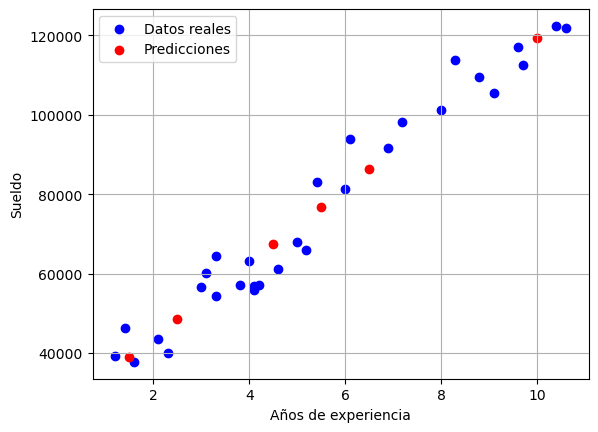

In [18]:
plt.scatter(x, y, c='blue', label='Datos reales')
plt.scatter(x_new, ŷ_new, c='red', label='Predicciones')
plt.xlabel('Años de experiencia')
plt.ylabel('Sueldo')
plt.legend()
plt.grid(True)
plt.show()

## Fuentes

- Este notebook está basado en [este](https://github.com/FranPuentes/iTI2024/blob/main/Cap.%2017%20-%20regresi%C3%B3n%20lineal%20simple.ipynb) del profesor [Juan Francisco Puentes Calvo](https://github.com/FranPuentes/iTI2024)
- Se usa una modificación de [este dataset](https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression).
- [Linear Regression in Python](https://realpython.com/linear-regression-in-python)
- https://cienciadedatos.net/documentos/py10-regresion-lineal-python
- [Regresión Lineal y Mínimos Cuadrados Ordinarios | DotCSV](https://www.youtube.com/watch?v=k964_uNn3l0)
- [Visualización de errores en regresión lineal](https://observablehq.com/@yizhe-ang/interactive-visualization-of-linear-regression)
- [Cost Function of Linear Regression: Deep Learning for Beginners](https://builtin.com/machine-learning/cost-function)